<a href="https://colab.research.google.com/github/SiLiKhon/HEPStatsSeminar/blob/Alexey/seminar2/Linear_models_no_weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install uproot
import uproot
%matplotlib inline

    100% |████████████████████████████████| 143kB 6.7MB/s 
    100% |████████████████████████████████| 81kB 6.9MB/s 
    100% |████████████████████████████████| 133kB 7.1MB/s 
  Running setup.py bdist_wheel for lz4 ... - \ | / - \ | / - \ | / - done
  Stored in directory: /root/.cache/pip/wheels/9a/bf/d1/b771620d908af63302309490d1892224364bb541f8e84af67d
Successfully built lz4


# Samples

We will consider the following physics processes:
* Signal: $pp \rightarrow H \rightarrow ZZ^{*} \rightarrow \ell\ell\ell\ell$
* Background: $pp \rightarrow ZZ^{*} \rightarrow \ell\ell\ell\ell$

These samples are produced using [FCCSW](https://github.com/HEP-FCC/FCCSW) , which is proposed Common software for all [FCC experiments](http://cern.ch/fcc). The samples are:
* generated with [Pythia8](http://home.thep.lu.se/Pythia/) (interfaced to FCCSW)
* went through parametric detector simulation with [Delphes](https://cp3.irmp.ucl.ac.be/projects/delphes) (interfaced to FCCSW)
* passed event selection with [Heppy analysis framework](https://github.com/cbernet/heppy)

The samples are flat n-tuples.

See [FCC tutorials](https://github.com/HEP-FCC/fcc-tutorials/blob/master/FccFullAnalysis.md) for details.


In [0]:
pp_h_4l_file = uproot.open("https://raw.githubusercontent.com/SiLiKhon/HEPStatsSeminar/master/data/pp_h_4l_tree.root")["events"]
pp_zgzg_4l_file = uproot.open("https://boldyrev.web.cern.ch/test-boldyrev/pp_zgzg_4l_full_tree.root")["events"]

In [3]:
pp_zgzg_4l_file.keys()

[b'weight',
 b'lep1vsPt_pdgid',
 b'lep1vsPt_e',
 b'lep1vsPt_pt',
 b'lep1vsPt_px',
 b'lep1vsPt_py',
 b'lep1vsPt_pz',
 b'lep1vsPt_theta',
 b'lep1vsPt_eta',
 b'lep1vsPt_phi',
 b'lep1vsPt_m',
 b'lep2vsPt_pdgid',
 b'lep2vsPt_e',
 b'lep2vsPt_pt',
 b'lep2vsPt_px',
 b'lep2vsPt_py',
 b'lep2vsPt_pz',
 b'lep2vsPt_theta',
 b'lep2vsPt_eta',
 b'lep2vsPt_phi',
 b'lep2vsPt_m',
 b'lep3vsPt_pdgid',
 b'lep3vsPt_e',
 b'lep3vsPt_pt',
 b'lep3vsPt_px',
 b'lep3vsPt_py',
 b'lep3vsPt_pz',
 b'lep3vsPt_theta',
 b'lep3vsPt_eta',
 b'lep3vsPt_phi',
 b'lep3vsPt_m',
 b'lep4vsPt_pdgid',
 b'lep4vsPt_e',
 b'lep4vsPt_pt',
 b'lep4vsPt_px',
 b'lep4vsPt_py',
 b'lep4vsPt_pz',
 b'lep4vsPt_theta',
 b'lep4vsPt_eta',
 b'lep4vsPt_phi',
 b'lep4vsPt_m',
 b'lep1vsEta_pdgid',
 b'lep1vsEta_e',
 b'lep1vsEta_pt',
 b'lep1vsEta_px',
 b'lep1vsEta_py',
 b'lep1vsEta_pz',
 b'lep1vsEta_theta',
 b'lep1vsEta_eta',
 b'lep1vsEta_phi',
 b'lep1vsEta_m',
 b'lep2vsEta_pdgid',
 b'lep2vsEta_e',
 b'lep2vsEta_pt',
 b'lep2vsEta_px',
 b'lep2vsEta_py',
 b'lep

Let's select kinematic variables and insert them into pandas dataframe (it may take a while):

In [0]:
kin_vars = ['lep1vsPt_e', 'lep1vsPt_pt', 'lep1vsPt_px', 'lep1vsPt_py', 'lep1vsPt_pz', 'lep1vsPt_theta', 'lep1vsPt_eta', 'lep1vsPt_phi', \
        'lep2vsPt_e', 'lep2vsPt_pt', 'lep2vsPt_px', 'lep2vsPt_py', 'lep2vsPt_pz', 'lep2vsPt_theta', 'lep2vsPt_eta', 'lep2vsPt_phi', \
        'lep3vsPt_e', 'lep3vsPt_pt', 'lep3vsPt_px', 'lep3vsPt_py', 'lep3vsPt_pz', 'lep3vsPt_theta', 'lep3vsPt_eta', 'lep3vsPt_phi', \
        'lep4vsPt_e', 'lep4vsPt_pt', 'lep4vsPt_px', 'lep4vsPt_py', 'lep4vsPt_pz', 'lep4vsPt_theta', 'lep4vsPt_eta', 'lep4vsPt_phi']
pp_h_4l = pp_h_4l_file.pandas.df(kin_vars)
pp_zgzg_4l = pp_zgzg_4l_file.pandas.df(kin_vars)
# pp_h_4l.head()

In [5]:
pp_zgzg_4l.head()

,lep1vsPt_e,lep1vsPt_pt,lep1vsPt_px,lep1vsPt_py,lep1vsPt_pz,lep1vsPt_theta,lep1vsPt_eta,lep1vsPt_phi,lep2vsPt_e,lep2vsPt_pt,...,lep3vsPt_eta,lep3vsPt_phi,lep4vsPt_e,lep4vsPt_pt,lep4vsPt_px,lep4vsPt_py,lep4vsPt_pz,lep4vsPt_theta,lep4vsPt_eta,lep4vsPt_phi
0,359.623652,220.885788,185.147583,-120.461212,-283.793304,-0.909407,-1.069147,-0.576813,664.367811,210.392846,...,-1.379478,-1.272788,56.658779,25.239162,-2.072085,25.153961,-50.726738,-1.109109,-1.448028,1.652987
1,137.607901,118.920024,-75.331207,92.017288,69.238365,0.527248,0.553524,2.256814,116.168970,88.153423,...,0.210306,0.763760,151.800959,26.898023,13.308238,-23.375082,149.398849,1.392663,2.415721,-1.053230
2,68.943352,68.862544,62.130150,-29.696709,3.335363,0.048397,0.048416,-0.445874,24.910594,8.082096,...,-0.095600,3.032638,13.356255,6.676740,-4.621915,-4.818377,11.567657,1.047318,1.317198,-2.335386
3,114.641608,25.437161,11.195876,-22.840786,-111.783890,-1.347050,-2.186205,-1.115043,181.883670,22.942466,...,-1.317055,0.158419,131.152192,6.405683,6.230175,1.489192,-130.995667,-1.521935,-3.711723,0.234627
4,4711.518806,42.712477,30.245499,-30.159004,-4711.325195,-1.561731,-5.396401,-0.783966,1340.547067,36.527474,...,-1.742168,2.168648,557.710604,28.543984,23.542189,-16.140768,-556.979675,-1.519593,-3.664886,-0.601003


The following example plots the signal and background distributions of every variable for the 1st lepton.

One can see that the same variables from two samples are close each other.

lep1vsPt_e


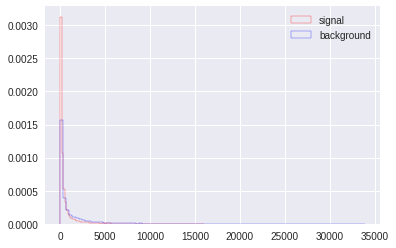

lep1vsPt_pt


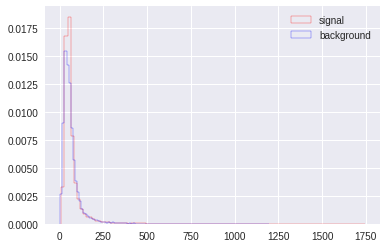

lep1vsPt_px


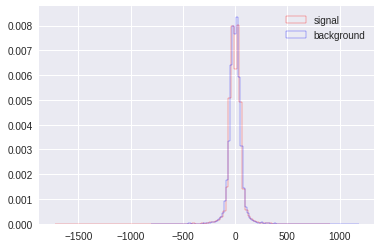

lep1vsPt_py


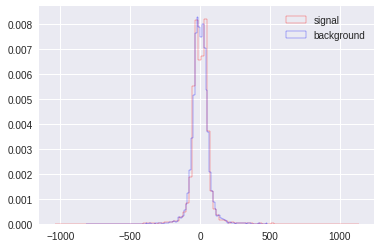

lep1vsPt_pz


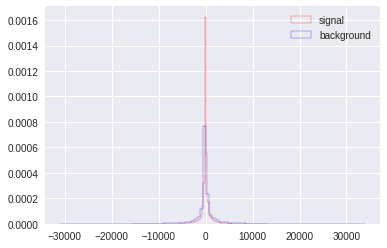

lep1vsPt_theta


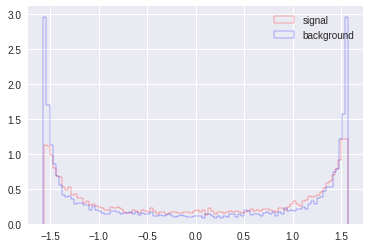

lep1vsPt_eta


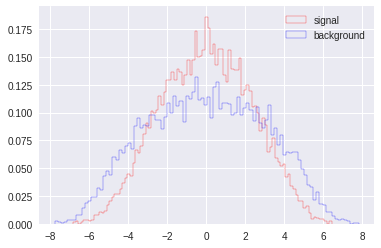

lep1vsPt_phi


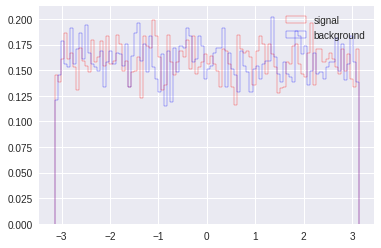

In [6]:
for var in kin_vars[:8]:
    print(var)
    plt.figure()
    plt.hist(pp_h_4l[var], bins=100, histtype="step", density=True, color="red", label="signal", stacked=True)
    plt.hist(pp_zgzg_4l[var], bins=100, histtype="step", density=True, color="blue", label="background", stacked=True)
    plt.legend(loc='upper right')
    plt.show()


# Fisher Discriminant
(aka Linear Discriminant Analysis, or LDA)

## Preparing samples

Let's put `signal` label to our samples in order to dinstigush them after combining. Now the first column stores the "truth" label of whether an event was signal or background:

In [7]:
pp_h_4l.insert(loc=0, column='signal', value=1.0)
pp_zgzg_4l.insert(loc=0, column='signal', value=0.0)

kin_vars.insert(0, 'signal') # insert 'signal' to our variables list too

# pp_h_4l['signal'] = 1.0
# pp_zgzg_4l['signal'] = 0.0
pp_h_4l.head()

,signal,lep1vsPt_e,lep1vsPt_pt,lep1vsPt_px,lep1vsPt_py,lep1vsPt_pz,lep1vsPt_theta,lep1vsPt_eta,lep1vsPt_phi,lep2vsPt_e,...,lep3vsPt_eta,lep3vsPt_phi,lep4vsPt_e,lep4vsPt_pt,lep4vsPt_px,lep4vsPt_py,lep4vsPt_pz,lep4vsPt_theta,lep4vsPt_eta,lep4vsPt_phi
0,1.0,40.817599,40.816309,-7.430504,-40.134258,0.324458,0.007949,0.007949,-1.753865,88.221803,...,0.904967,1.695575,11.299976,8.581384,-8.410522,1.703895,-7.351065,-0.708330,-0.776280,2.941707
1,1.0,1110.684463,50.237450,47.376976,-16.709984,1109.547729,1.525550,3.788606,-0.339080,916.350779,...,2.951899,2.957064,151.782980,9.268806,4.757098,7.954923,151.499710,1.509692,3.488011,1.031844
2,1.0,183.672265,73.585952,-32.633724,-65.954018,-168.287247,-1.158584,-1.565062,-2.030271,89.974504,...,-1.850662,2.450955,15.433533,4.738079,3.668590,2.998472,-14.687865,-1.258751,-1.849592,0.685223
3,1.0,42.281700,39.489943,-39.316151,-3.700795,-15.108787,-0.365416,-0.373830,-3.047740,46.944943,...,0.428923,0.706051,16.472994,15.589799,-7.054197,13.902523,5.321438,0.328940,0.335038,2.040350
4,1.0,704.754401,654.673065,190.100601,-626.465149,260.925171,0.379263,0.388696,-1.276178,325.376137,...,0.299380,-1.490367,33.783233,33.571311,7.927998,-32.621769,3.776598,0.112024,0.112259,-1.332390


Combine the samples:

In [35]:
frames = [pp_h_4l, pp_zgzg_4l]
ds = pd.concat(frames, ignore_index=True)
ds.head()

,signal,lep1vsPt_e,lep1vsPt_pt,lep1vsPt_px,lep1vsPt_py,lep1vsPt_pz,lep1vsPt_theta,lep1vsPt_eta,lep1vsPt_phi,lep2vsPt_e,...,lep3vsPt_eta,lep3vsPt_phi,lep4vsPt_e,lep4vsPt_pt,lep4vsPt_px,lep4vsPt_py,lep4vsPt_pz,lep4vsPt_theta,lep4vsPt_eta,lep4vsPt_phi
0,1.0,40.817599,40.816309,-7.430504,-40.134258,0.324458,0.007949,0.007949,-1.753865,88.221803,...,0.904967,1.695575,11.299976,8.581384,-8.410522,1.703895,-7.351065,-0.708330,-0.776280,2.941707
1,1.0,1110.684463,50.237450,47.376976,-16.709984,1109.547729,1.525550,3.788606,-0.339080,916.350779,...,2.951899,2.957064,151.782980,9.268806,4.757098,7.954923,151.499710,1.509692,3.488011,1.031844
2,1.0,183.672265,73.585952,-32.633724,-65.954018,-168.287247,-1.158584,-1.565062,-2.030271,89.974504,...,-1.850662,2.450955,15.433533,4.738079,3.668590,2.998472,-14.687865,-1.258751,-1.849592,0.685223
3,1.0,42.281700,39.489943,-39.316151,-3.700795,-15.108787,-0.365416,-0.373830,-3.047740,46.944943,...,0.428923,0.706051,16.472994,15.589799,-7.054197,13.902523,5.321438,0.328940,0.335038,2.040350
4,1.0,704.754401,654.673065,190.100601,-626.465149,260.925171,0.379263,0.388696,-1.276178,325.376137,...,0.299380,-1.490367,33.783233,33.571311,7.927998,-32.621769,3.776598,0.112024,0.112259,-1.332390


Randomly permute rows in the combined sample:

In [36]:
np.random.seed(14)
ds = ds.iloc[np.random.permutation(len(ds))].reset_index(drop=True).copy()
ds.head()

,signal,lep1vsPt_e,lep1vsPt_pt,lep1vsPt_px,lep1vsPt_py,lep1vsPt_pz,lep1vsPt_theta,lep1vsPt_eta,lep1vsPt_phi,lep2vsPt_e,...,lep3vsPt_eta,lep3vsPt_phi,lep4vsPt_e,lep4vsPt_pt,lep4vsPt_px,lep4vsPt_py,lep4vsPt_pz,lep4vsPt_theta,lep4vsPt_eta,lep4vsPt_phi
0,0.0,445.321523,57.944229,-42.477551,-39.410549,441.535645,1.440309,2.728203,-2.393631,53.248678,...,1.902200,1.175048,602.237690,12.472126,11.300107,-5.278400,602.108521,1.550085,4.570196,-0.436992
1,0.0,140.055417,136.332350,-108.544930,82.489441,32.078190,0.231091,0.233175,2.491750,891.217773,...,-1.632444,-0.326208,38.908363,31.731214,4.377998,31.427744,-22.516455,-0.617140,-0.660513,1.432383
2,0.0,6447.025049,121.690473,-85.802719,86.292900,-6445.876465,-1.551920,-4.662951,2.353346,864.940291,...,-3.439142,2.217880,85.853992,18.497323,-8.081850,16.638350,-83.837616,-1.353643,-2.216356,2.022968
3,0.0,158.721086,152.341702,122.331612,90.790810,-44.546478,-0.284480,-0.288397,0.638471,33.440456,...,-0.744746,2.525607,13.407958,8.359232,4.510383,7.037983,-10.483157,-0.897645,-1.050140,1.000871
4,0.0,237.150139,36.368379,1.744334,-36.326523,234.344894,1.416833,2.562209,-1.522815,38.519199,...,4.663505,0.974437,100.019126,22.121250,-0.835638,22.105461,97.542175,1.347782,2.189510,1.608581


In [0]:
N_Train=9999

Train_Sample=ds[:N_Train]
Test_Sample=ds[N_Train:]

X_Train=Train_Sample[kin_vars[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[kin_vars[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]

## Using classifier

[Scikit-learn](http://scikit-learn.org/) is a rich python library for data science, including machine learning. The [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html#dimensionality-reduction-using-linear-discriminant-analysis) does as great job explaining this classifier. Here's how we instanciate the classifier:

In [0]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

We can train the classifier as follow:

In [39]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

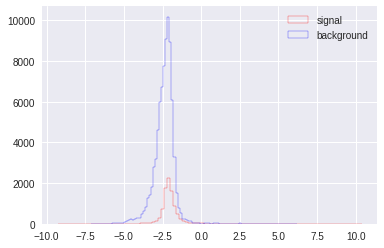

In [40]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[kin_vars[1:]]),bins=100,histtype="step", color="red", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[kin_vars[1:]]),bins=100,histtype="step", color="blue", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

## Retrieving ROC
And we can make a ROC curve and evaluate the AUC:

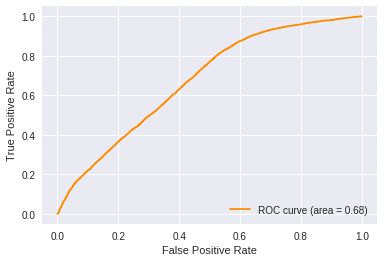

In [41]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

## Let's introduce features

In [0]:
ds['m2'] = (ds['lep1vsPt_e'] +ds['lep2vsPt_e'] +ds['lep3vsPt_e'] +ds['lep4vsPt_e'])**2 \
         - (ds['lep1vsPt_px']+ds['lep2vsPt_px']+ds['lep3vsPt_px']+ds['lep4vsPt_px'])**2 \
         - (ds['lep1vsPt_py']+ds['lep2vsPt_py']+ds['lep3vsPt_py']+ds['lep4vsPt_py'])**2 \
         - (ds['lep1vsPt_pz']+ds['lep2vsPt_pz']+ds['lep3vsPt_pz']+ds['lep4vsPt_pz'])**2

ds['m'] = ds['m2']**0.5

**Invariant mass of 4 leptons**

m_4l


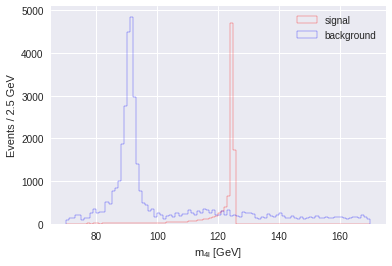

In [43]:
print("m_4l")
plt.figure()
plt.hist(ds.loc[ds['signal'] == 1.0]['m'], bins=100, range=(70., 170.), histtype="step", color="red", label="signal", stacked=True)
plt.hist(ds.loc[ds['signal'] == 0.0]['m'], bins=100, range=(70., 170.), histtype="step", color="blue", label="background", stacked=True)
plt.legend(loc='upper right')
plt.xlabel('$\mathregular{m_{4l}}$ [GeV]')
plt.ylabel('Events / 2.5 GeV')
plt.show()

## Preparing samples (again)

In [45]:
ds_with_features = ds.copy()
ds_with_features.head()

,signal,lep1vsPt_e,lep1vsPt_pt,lep1vsPt_px,lep1vsPt_py,lep1vsPt_pz,lep1vsPt_theta,lep1vsPt_eta,lep1vsPt_phi,lep2vsPt_e,...,lep4vsPt_e,lep4vsPt_pt,lep4vsPt_px,lep4vsPt_py,lep4vsPt_pz,lep4vsPt_theta,lep4vsPt_eta,lep4vsPt_phi,m2,m
0,0.0,445.321523,57.944229,-42.477551,-39.410549,441.535645,1.440309,2.728203,-2.393631,53.248678,...,602.237690,12.472126,11.300107,-5.278400,602.108521,1.550085,4.570196,-0.436992,39802.175172,199.504825
1,0.0,140.055417,136.332350,-108.544930,82.489441,32.078190,0.231091,0.233175,2.491750,891.217773,...,38.908363,31.731214,4.377998,31.427744,-22.516455,-0.617140,-0.660513,1.432383,473583.527508,688.174053
2,0.0,6447.025049,121.690473,-85.802719,86.292900,-6445.876465,-1.551920,-4.662951,2.353346,864.940291,...,85.853992,18.497323,-8.081850,16.638350,-83.837616,-1.353643,-2.216356,2.022968,166993.904892,408.648877
3,0.0,158.721086,152.341702,122.331612,90.790810,-44.546478,-0.284480,-0.288397,0.638471,33.440456,...,13.407958,8.359232,4.510383,7.037983,-10.483157,-0.897645,-1.050140,1.000871,27154.777155,164.787066
4,0.0,237.150139,36.368379,1.744334,-36.326523,234.344894,1.416833,2.562209,-1.522815,38.519199,...,100.019126,22.121250,-0.835638,22.105461,97.542175,1.347782,2.189510,1.608581,119510.274328,345.702581


In [0]:
features = kin_vars.copy()

features.append('m')

In [0]:
N_Train=9999

Train_Sample=ds_with_features[:N_Train]
Test_Sample=ds_with_features[N_Train:]

X_Train=Train_Sample[kin_vars[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[kin_vars[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]



X_Train_Raw=Train_Sample[kin_vars]
X_Test_Raw=Test_Sample[kin_vars]

X_Train_Features=Train_Sample[features]
X_Test_Features=Test_Sample[features]

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


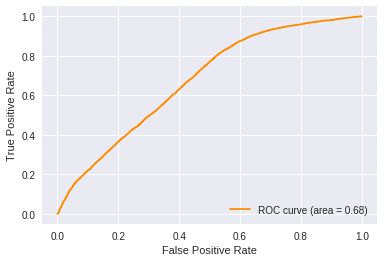

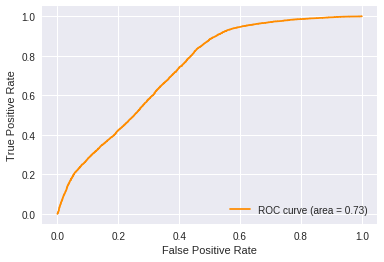

In [48]:
def TrainFisher(X_Train,X_Test,y_Train):
    Fisher=DA.LinearDiscriminantAnalysis()
    Fisher.fit(X_Train,y_Train)

    fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.legend(loc="lower right")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
    return Fisher

kin_vars_Fisher=TrainFisher(X_Train_Raw,X_Test_Raw,y_Train)
features_Fisher=TrainFisher(X_Train_Features,X_Test_Features,y_Train)

## Significance

The following function calculates the significance of the observation of the signal given the number of expected Signal and Background events, using the simple formula $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$. Read through the code carefully.

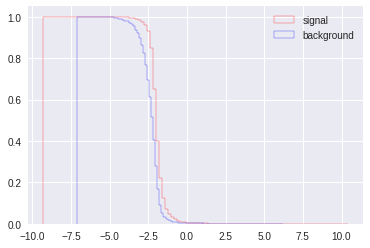

100


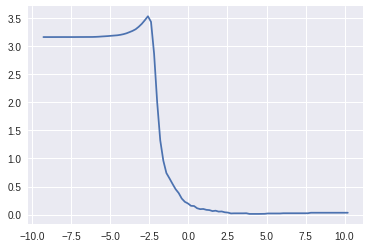

Max significance at  -2.5961710140266714  of 3.5330026264849317


(-2.5961710140266714, 3.5330026264849317, 34)

In [51]:
def PlotSignificance(N_S,N_B, N_S_min=1):
    plt.figure()
    eff_sig,bins_sig,p_sig=plt.hist(Fisher.decision_function(Test_sig[kin_vars[1:]]),bins=100,histtype="step",color="red",label="signal",cumulative=-1,stacked=True,normed=True)
    eff_bkg,bins_bkg,p_bkg=plt.hist(Fisher.decision_function(Test_bkg[kin_vars[1:]]),bins=100,histtype="step",color="blue",label="background",cumulative=-1,stacked=True,normed=True)
    plt.legend(loc='upper right')
    plt.show()
    
    good_bins = np.where(eff_sig*N_S>=N_S_min)

    print(len(good_bins[0]))
    if len(good_bins[0])<1:
        print("Insufficient Signal.")
        return 0,0,0
    
    significance=(N_S*eff_sig)/np.sqrt((N_B*eff_bkg)+(N_S*eff_sig))

    plt.figure()
    plt.plot(bins_sig[:-1],significance)
    
    max_sign=np.max(significance[good_bins])
    max_signI=np.argmax(significance[good_bins])
    
    plt.show()
    print("Max significance at ", bins_sig[max_signI], " of", max_sign)
    return bins_sig[max_signI],max_sign, max_signI
    
PlotSignificance(1000000,1e11)

# LogisticRegression

## Preparing samples

In [0]:
dsw = ds.copy()

In [54]:
dsw['m2'] = (dsw['lep1vsPt_e'] +dsw['lep2vsPt_e'] +dsw['lep3vsPt_e'] +dsw['lep4vsPt_e'])**2 \
          - (dsw['lep1vsPt_px']+dsw['lep2vsPt_px']+dsw['lep3vsPt_px']+dsw['lep4vsPt_px'])**2 \
          - (dsw['lep1vsPt_py']+dsw['lep2vsPt_py']+dsw['lep3vsPt_py']+dsw['lep4vsPt_py'])**2 \
          - (dsw['lep1vsPt_pz']+dsw['lep2vsPt_pz']+dsw['lep3vsPt_pz']+dsw['lep4vsPt_pz'])**2

dsw['m'] = dsw['m2']**0.5
dsw.head()

,signal,lep1vsPt_e,lep1vsPt_pt,lep1vsPt_px,lep1vsPt_py,lep1vsPt_pz,lep1vsPt_theta,lep1vsPt_eta,lep1vsPt_phi,lep2vsPt_e,...,lep4vsPt_e,lep4vsPt_pt,lep4vsPt_px,lep4vsPt_py,lep4vsPt_pz,lep4vsPt_theta,lep4vsPt_eta,lep4vsPt_phi,m2,m
0,0.0,445.321523,57.944229,-42.477551,-39.410549,441.535645,1.440309,2.728203,-2.393631,53.248678,...,602.237690,12.472126,11.300107,-5.278400,602.108521,1.550085,4.570196,-0.436992,39802.175172,199.504825
1,0.0,140.055417,136.332350,-108.544930,82.489441,32.078190,0.231091,0.233175,2.491750,891.217773,...,38.908363,31.731214,4.377998,31.427744,-22.516455,-0.617140,-0.660513,1.432383,473583.527508,688.174053
2,0.0,6447.025049,121.690473,-85.802719,86.292900,-6445.876465,-1.551920,-4.662951,2.353346,864.940291,...,85.853992,18.497323,-8.081850,16.638350,-83.837616,-1.353643,-2.216356,2.022968,166993.904892,408.648877
3,0.0,158.721086,152.341702,122.331612,90.790810,-44.546478,-0.284480,-0.288397,0.638471,33.440456,...,13.407958,8.359232,4.510383,7.037983,-10.483157,-0.897645,-1.050140,1.000871,27154.777155,164.787066
4,0.0,237.150139,36.368379,1.744334,-36.326523,234.344894,1.416833,2.562209,-1.522815,38.519199,...,100.019126,22.121250,-0.835638,22.105461,97.542175,1.347782,2.189510,1.608581,119510.274328,345.702581


In [0]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [0]:
train, test = train_test_split(dsw, test_size=0.25)

In [0]:
from sklearn.preprocessing import RobustScaler

## Defining features

In [0]:
def features(x):
    return np.array([
x['lep1vsPt_e'], x['lep1vsPt_pt'], x['lep1vsPt_px'], x['lep1vsPt_py'], x['lep1vsPt_pz'], x['lep1vsPt_theta'], x['lep1vsPt_eta'], x['lep1vsPt_phi'], \
x['lep2vsPt_e'], x['lep2vsPt_pt'], x['lep2vsPt_px'], x['lep2vsPt_py'], x['lep2vsPt_pz'], x['lep2vsPt_theta'], x['lep2vsPt_eta'], x['lep2vsPt_phi'], \
x['lep3vsPt_e'], x['lep3vsPt_pt'], x['lep3vsPt_px'], x['lep3vsPt_py'], x['lep3vsPt_pz'], x['lep3vsPt_theta'], x['lep3vsPt_eta'], x['lep3vsPt_phi'], \
x['lep4vsPt_e'], x['lep4vsPt_pt'], x['lep4vsPt_px'], x['lep4vsPt_py'], x['lep4vsPt_pz'], x['lep4vsPt_theta'], x['lep4vsPt_eta'], x['lep4vsPt_phi'], \
x['m'], \
    ]).T

## Using classifier

In [59]:
scaler = RobustScaler()
model = LogisticRegression()
scaler.fit(features(train))
model.fit(scaler.transform(features(train)), train.signal)

preds_train = model.predict_proba(scaler.transform(features(train)))[:,1]
preds_test  = model.predict_proba(scaler.transform(features(test )))[:,1]

print(roc_auc_score(train.signal, preds_train))
print(roc_auc_score(test .signal, preds_test ))

0.771586654051376
0.7607986050659905


## Retrieving ROC

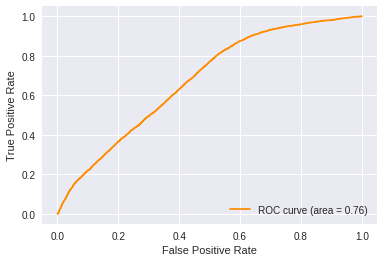

In [60]:
fpr_mod, tpr_mod, _ = roc_curve(test.signal, preds_test)

roc_auc = auc(fpr_mod, tpr_mod)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [61]:
scaler.transform(features(train))

array([[ 2.21098748e-03, -1.11291435e+00, -1.06981034e-01, ...,
         9.72158783e-01, -8.29840091e-02, -8.17787116e-01],
       [-2.30300314e-01, -1.05871709e+00, -1.00504881e-01, ...,
        -3.83899547e-02, -2.97439556e-01, -7.04016916e-01],
       [-2.25104256e-01,  4.45154864e-01,  1.06715026e+00, ...,
        -3.71438768e-01,  3.34318611e-01,  5.06902962e-01],
       ...,
       [ 4.31295929e+00,  4.12550056e-01,  5.69301021e-01, ...,
         9.78170409e-01, -8.55649334e-01, -1.01040888e-01],
       [-2.27719143e-01, -2.99571739e-02, -7.10698228e-01, ...,
        -2.26014293e-01, -9.22816195e-01, -3.45959416e-01],
       [-2.58468423e-01, -6.71411317e-01,  2.68707686e-01, ...,
        -3.69617987e-01,  5.72026076e-03, -3.66000085e-01]])

## Significance

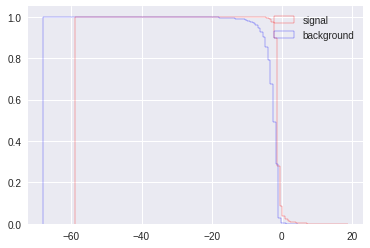

100


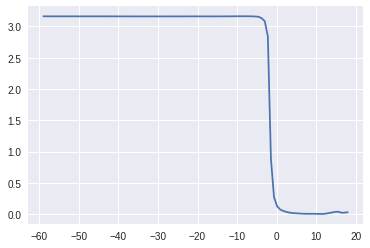

Max significance at  -7.666978840986765  of 3.163385965133351


(-7.666978840986765, 3.163385965133351, 66)

In [62]:
def PlotSignificance(N_S,N_B, N_S_min=1):
    plt.figure()
    eff_sig,bins_sig,p_sig=plt.hist(model.decision_function(scaler.transform(features(train[train.signal == 1.0]))),bins=100,histtype="step",color="red",label="signal",cumulative=-1,stacked=True,normed=True)
    eff_bkg,bins_bkg,p_bkg=plt.hist(model.decision_function(scaler.transform(features(train[train.signal == 0.0]))),bins=100,histtype="step",color="blue",label="background",cumulative=-1,stacked=True,normed=True)
    plt.legend(loc='upper right')
    plt.show()
    
    good_bins = np.where(eff_sig*N_S>=N_S_min)

    print(len(good_bins[0]))
    if len(good_bins[0])<1:
        print("Insufficient Signal.")
        return 0,0,0
    
    significance=(N_S*eff_sig)/np.sqrt((N_B*eff_bkg)+(N_S*eff_sig))

    plt.figure()
    plt.plot(bins_sig[:-1],significance)
    
    max_sign=np.max(significance[good_bins])
    max_signI=np.argmax(significance[good_bins])
    
    plt.show()
    print("Max significance at ", bins_sig[max_signI], " of", max_sign)
    return bins_sig[max_signI],max_sign, max_signI
    
PlotSignificance(1000000,1e11)